<a href="https://colab.research.google.com/github/ssravali/Research-1/blob/master/CNN3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Libraries initiated
import numpy as np
import pickle
import matplotlib.pyplot as plt  
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import logging
from time import time
import pandas as pd
from keras.layers import Flatten
from keras import optimizers
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.preprocessing import sequence
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from keras.layers import Conv1D, Dropout
from keras.layers import MaxPooling1D
import scipy.io as sio
import keras
import random
print("Imported libraries")

Using TensorFlow backend.


Imported libraries


- Here data is taken from the agument.mat file which has the signals with even their noises.
- The y is converted to one hot so that it is easy for the clssiafier
- Test data also has noise added in it so only raw signals are tested for accuracy
- The data is split into 3 sets. Test Train and Val
- The val data is random

In [0]:
mat_contents = sio.loadmat('augtestx.mat')
testx = np.array(mat_contents['test_x'])
test_x = testx[0:200]

mat_contents = sio.loadmat('augtesty.mat')
testy = np.array(mat_contents['test_y'])
test_y = testy[0:200]

mat_contents = sio.loadmat('augtrainx.mat')
train_x = np.array(mat_contents['train_x'])

mat_contents = sio.loadmat('augtrainy.mat')
trainy = np.array(mat_contents['train_y'])

train_x, val_x, train_y, val_y = train_test_split(train_x, trainy, test_size=0.2, random_state=42)
# binary encode
train_y = OneHotEncoder(sparse=False,categories='auto').fit_transform(train_y)
test_y = OneHotEncoder(sparse=False,categories='auto').fit_transform(test_y)
val_y = OneHotEncoder(sparse=False,categories='auto').fit_transform(val_y)
print("Train_y one hot:", train_y.shape)
print("Test_y one hot:", test_y.shape)
print("val_y one hot:", val_y.shape)

#train_x = train_x.reshape(400,2800,10,1)
#test_x = test_x.reshape(200,2800,10,1)
print(train_x.shape)
print(test_x.shape)
print(val_x.shape)
classes = np.unique(trainy)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)
print("loaded data")


- Here data is taken from the agument.mat file which has the signals with even their noises.
- The y is converted to one hot so that it is easy for the clssiafier
- Test data has only raw signals 
- The val data is selected from the training data hence it is a new person
- Test data is also of new people

In [0]:
mat_contents = sio.loadmat('augtestx.mat')
testx = np.array(mat_contents['test_x'])
test_x = testx[0:200]

mat_contents = sio.loadmat('augtesty.mat')
testy = np.array(mat_contents['test_y'])
test_y = testy[0:200]

mat_contents = sio.loadmat('augtrainx.mat')
train_x = np.array(mat_contents['train_x'])

mat_contents = sio.loadmat('augtrainy.mat')
trainy = np.array(mat_contents['train_y'])

# binary encode
train_y = OneHotEncoder(sparse=False,categories='auto').fit_transform(trainy)
test_y = OneHotEncoder(sparse=False,categories='auto').fit_transform(test_y)

print("Train_y one hot:", train_y.shape)
print("Test_y one hot:", test_y.shape)

#train_x = train_x.reshape(400,2800,10,1)
#test_x = test_x.reshape(200,2800,10,1)
print(train_x.shape)
print(test_x.shape)
classes = np.unique(trainy)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)
print("loaded data")


Train_y one hot: (1200, 10)
Test_y one hot: (200, 10)
(1200, 2800, 10)
(200, 2800, 10)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]
loaded data


- Here data is taken from the agument.mat file which has the signals with even their noises.
- The y is converted to one hot so that it is easy for the clssiafier
- Test data also has noise added in it so only raw signals are tested for accuracy
- The val data is selected from the training data hence it is a new person
- Test data is also of new people

In [0]:
mat_contents = sio.loadmat('augtestx.mat')
test_x = np.array(mat_contents['test_x'])
#test_x = testx[0:200]

mat_contents = sio.loadmat('augtesty.mat')
testy = np.array(mat_contents['test_y'])
#test_y = testy[0:200]

mat_contents = sio.loadmat('augtrainx.mat')
train_x = np.array(mat_contents['train_x'])

mat_contents = sio.loadmat('augtrainy.mat')
trainy = np.array(mat_contents['train_y'])

# binary encode
train_y = OneHotEncoder(sparse=False,categories='auto').fit_transform(trainy)
test_y = OneHotEncoder(sparse=False,categories='auto').fit_transform(testy)

print("Train_y one hot:", train_y.shape)
print("Test_y one hot:", test_y.shape)

#train_x = train_x.reshape(400,2800,10,1)
#test_x = test_x.reshape(200,2800,10,1)
print(train_x.shape)
print(test_x.shape)

classes = np.unique(trainy)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)
print("loaded data")


NameError: ignored

- Here data is taken from the agument.mat file which has the signals with even their noises.
- The y is converted to one hot so that it is easy for the clssiafier
- only raw signals are tested for accuracy
- The val data is selected from the testing data hence it is a new person
- Test data is similar as validation hence it isnt new persom

In [0]:
mat_contents = sio.loadmat('augtestx.mat')
testx = np.array(mat_contents['test_x'])
test_x = testx[0:200]

mat_contents = sio.loadmat('augtesty.mat')
testy = np.array(mat_contents['test_y'])
test_y = testy[0:200]

mat_contents = sio.loadmat('augtrainx.mat')
train_x = np.array(mat_contents['train_x'])

mat_contents = sio.loadmat('augtrainy.mat')
train_y = np.array(mat_contents['train_y'])

r = random.sample(range(test_x.shape[0]), k=100)
val_x = test_x[r]
val_y = test_y[r]

classes = np.unique(train_y)
nClasses = len(classes)

# binary encode
train_y = OneHotEncoder(sparse=False,categories='auto').fit_transform(train_y)
test_y = OneHotEncoder(sparse=False,categories='auto').fit_transform(test_y)
val_y = OneHotEncoder(sparse=False,categories='auto').fit_transform(val_y)
print("Train_y one hot:", train_y.shape)
print("Test_y one hot:", test_y.shape)
print("val_y one hot:", val_y.shape)

#train_x = train_x.reshape(400,2800,10,1)
#test_x = test_x.reshape(200,2800,10,1)
print(train_x.shape)
print(test_x.shape)
print(val_x.shape)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)
print("loaded data")


Train_y one hot: (1200, 10)
Test_y one hot: (200, 10)
val_y one hot: (100, 10)
(1200, 2800, 10)
(200, 2800, 10)
(100, 2800, 10)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]
loaded data


- Early stopping was removed as trining was stopping abrunptly without completion
- more epochs are required mostly

Train on 960 samples, validate on 240 samples
Epoch 1/100
 - 3s - loss: 0.1672 - acc: 0.1094 - mean_absolute_error: 0.1805 - val_loss: 0.1767 - val_acc: 0.1667 - val_mean_absolute_error: 0.1959
Epoch 2/100
 - 2s - loss: 0.1646 - acc: 0.1375 - mean_absolute_error: 0.1753 - val_loss: 0.1813 - val_acc: 0.1667 - val_mean_absolute_error: 0.1967
Epoch 3/100
 - 2s - loss: 0.1668 - acc: 0.1375 - mean_absolute_error: 0.1752 - val_loss: 0.1750 - val_acc: 0.1833 - val_mean_absolute_error: 0.1928
Epoch 4/100
 - 2s - loss: 0.1623 - acc: 0.1688 - mean_absolute_error: 0.1716 - val_loss: 0.1747 - val_acc: 0.1833 - val_mean_absolute_error: 0.1933
Epoch 5/100
 - 2s - loss: 0.1602 - acc: 0.1802 - mean_absolute_error: 0.1705 - val_loss: 0.1579 - val_acc: 0.2458 - val_mean_absolute_error: 0.1812
Epoch 6/100
 - 2s - loss: 0.1581 - acc: 0.1833 - mean_absolute_error: 0.1693 - val_loss: 0.1579 - val_acc: 0.2500 - val_mean_absolute_error: 0.1806
Epoch 7/100
 - 2s - loss: 0.1581 - acc: 0.1958 - mean_absolute_err

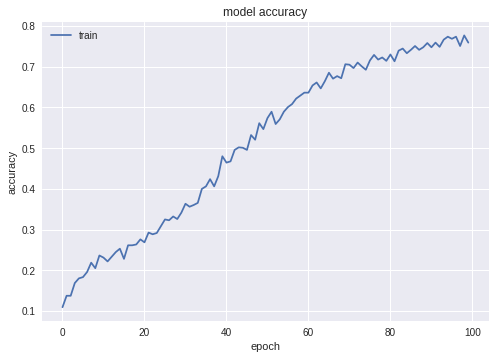

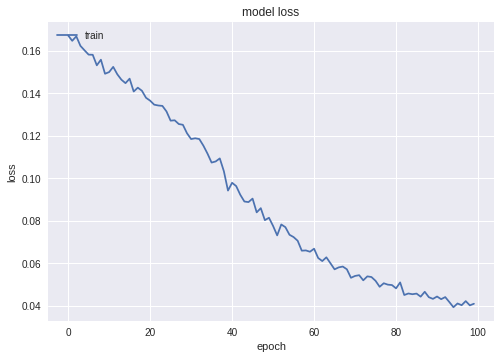

200/200 [==============================] - 0s 2ms/step
Test loss: 0.07095684170722961
Test accuracy: 0.565
(200, 10)
[[17  1  0  0  0  0  1  0  1  0]
 [ 2 14  2  2  0  0  0  0  0  0]
 [ 0  1 16  2  0  0  1  0  0  0]
 [ 0  4  1 14  0  0  1  0  0  0]
 [ 1  1  0  1  0 14  3  0  0  0]
 [ 0  0  0  0  0 14  4  1  1  0]
 [ 0  0  0  0  0  6 11  3  0  0]
 [ 0  0  0  3  0  1  2 12  2  0]
 [ 1  0  0  0  0  2  2  0 15  0]
 [ 0  0  0  0  0 11  1  0  8  0]]
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        20
           1       0.67      0.70      0.68        20
           2       0.84      0.80      0.82        20
           3       0.64      0.70      0.67        20
           4       0.00      0.00      0.00        20
           5       0.29      0.70      0.41        20
           6       0.42      0.55      0.48        20
           7       0.75      0.60      0.67        20
           8       0.56      0.75      0.64        20
           

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
model = Sequential()
model.add(Conv1D(10, kernel_size=(3), activation='relu', 
                 data_format="channels_last"))
model.add(MaxPooling1D(pool_size=(3)))
model.add(Conv1D(5, kernel_size=(3), activation='relu',
                 data_format="channels_last"))
model.add(MaxPooling1D(pool_size=(3)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(loss='mean_squared_error',
              optimizer=optimizers.SGD(lr=0.01, momentum=0.8, decay=0.0005),
              metrics=['accuracy', 'mae'])
#callbacks = [EarlyStopping(monitor='val_loss', min_delta=0.001, patience=50, 
#                           verbose=0, mode='auto', baseline=None, 
#                           restore_best_weights=True)]
history = model.fit(train_x, train_y,batch_size=100,epochs=100,verbose=2,
                    validation_split=0.2) #,callbacks=callbacks)
model.summary()
print("Model Created") 

#plotting training
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#testing
score = model.evaluate(test_x, test_y, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

pred_y = model.predict(test_x)
print(pred_y.shape)
predy = np.argmax(pred_y, axis=1).T
print(confusion_matrix(testy[0:200], predy))
print(classification_report(testy[0:200], predy))

- epoch 200...still stable state hasn't been reached
- epoch 500 gave more stability but should aim for more so...

Train on 960 samples, validate on 240 samples
Epoch 1/1000
 - 3s - loss: 0.1661 - acc: 0.1094 - mean_absolute_error: 0.1810 - val_loss: 0.1260 - val_acc: 0.3542 - val_mean_absolute_error: 0.1601
Epoch 2/1000
 - 2s - loss: 0.1598 - acc: 0.1302 - mean_absolute_error: 0.1765 - val_loss: 0.1673 - val_acc: 0.0083 - val_mean_absolute_error: 0.1941
Epoch 3/1000
 - 2s - loss: 0.1557 - acc: 0.1573 - mean_absolute_error: 0.1701 - val_loss: 0.1665 - val_acc: 0.0250 - val_mean_absolute_error: 0.1922
Epoch 4/1000
 - 2s - loss: 0.1540 - acc: 0.1719 - mean_absolute_error: 0.1673 - val_loss: 0.1679 - val_acc: 0.2042 - val_mean_absolute_error: 0.1892
Epoch 5/1000
 - 2s - loss: 0.1557 - acc: 0.1656 - mean_absolute_error: 0.1695 - val_loss: 0.1762 - val_acc: 0.1792 - val_mean_absolute_error: 0.1940
Epoch 6/1000
 - 3s - loss: 0.1562 - acc: 0.1740 - mean_absolute_error: 0.1691 - val_loss: 0.1715 - val_acc: 0.0000e+00 - val_mean_absolute_error: 0.1965
Epoch 7/1000
 - 2s - loss: 0.1510 - acc: 0.1896 - mean_a

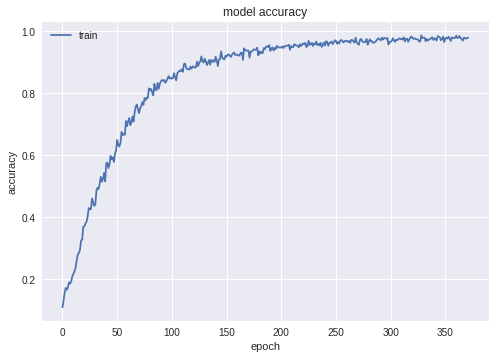

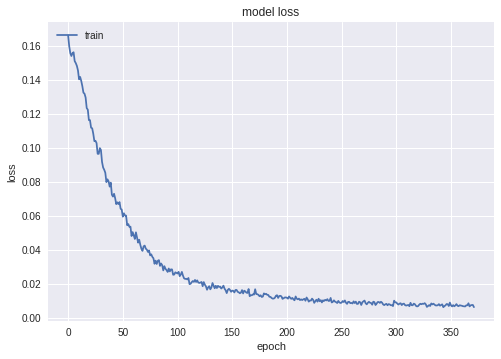

200/200 [==============================] - 0s 1ms/step
Test loss: 0.0551873505115509
Test accuracy: 0.63
(200, 10)
[[11  0  0  1  1  0  1  1  5  0]
 [ 0 17  3  0  0  0  0  0  0  0]
 [ 0  4 15  0  1  0  0  0  0  0]
 [ 0  1  2 11  0  0  4  1  1  0]
 [ 1  2  0  0 13  4  0  0  0  0]
 [ 0  0  0  0  4  9  4  2  0  1]
 [ 0  0  1  1  0  0 16  2  0  0]
 [ 0  1  0  4  0  0  2 12  1  0]
 [ 0  0  0  0  1  1  2  0 12  4]
 [ 4  0  0  1  0  0  0  1  4 10]]
              precision    recall  f1-score   support

           0       0.69      0.55      0.61        20
           1       0.68      0.85      0.76        20
           2       0.71      0.75      0.73        20
           3       0.61      0.55      0.58        20
           4       0.65      0.65      0.65        20
           5       0.64      0.45      0.53        20
           6       0.55      0.80      0.65        20
           7       0.63      0.60      0.62        20
           8       0.52      0.60      0.56        20
           9 

In [0]:
model = Sequential()
model.add(Conv1D(10, kernel_size=(3), activation='relu', 
                 data_format="channels_last"))
model.add(MaxPooling1D(pool_size=(3)))
model.add(Conv1D(5, kernel_size=(3), activation='relu',
                 data_format="channels_last"))
model.add(MaxPooling1D(pool_size=(3)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(loss='mean_squared_error',
              optimizer=optimizers.SGD(lr=0.01, momentum=0.8, decay=0.0005),
              metrics=['accuracy', 'mae'])
callbacks = [EarlyStopping(monitor='val_loss', min_delta=0.001, patience=100, 
                           verbose=0, mode='auto', baseline=None, 
                           restore_best_weights=True)]
history = model.fit(train_x, train_y,batch_size=100,epochs=1000,verbose=2,
                    validation_split=0.2, callbacks=callbacks)
model.summary()
print("Model Created") 

#plotting training
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#testing
score = model.evaluate(test_x, test_y, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

pred_y = model.predict(test_x)
print(pred_y.shape)
predy = np.argmax(pred_y, axis=1).T
print(confusion_matrix(testy[0:200], predy))
print(classification_report(testy[0:200], predy))

Train on 960 samples, validate on 240 samples
Epoch 1/500
 - 3s - loss: 0.1633 - acc: 0.1083 - mean_absolute_error: 0.1790 - val_loss: 0.1713 - val_acc: 0.1667 - val_mean_absolute_error: 0.1966
Epoch 2/500
 - 2s - loss: 0.1591 - acc: 0.1479 - mean_absolute_error: 0.1734 - val_loss: 0.1729 - val_acc: 0.1667 - val_mean_absolute_error: 0.1964
Epoch 3/500
 - 2s - loss: 0.1603 - acc: 0.1385 - mean_absolute_error: 0.1753 - val_loss: 0.1655 - val_acc: 0.1792 - val_mean_absolute_error: 0.1943
Epoch 4/500
 - 2s - loss: 0.1599 - acc: 0.1552 - mean_absolute_error: 0.1762 - val_loss: 0.1692 - val_acc: 0.1667 - val_mean_absolute_error: 0.1964
Epoch 5/500
 - 2s - loss: 0.1576 - acc: 0.1781 - mean_absolute_error: 0.1710 - val_loss: 0.1746 - val_acc: 0.1667 - val_mean_absolute_error: 0.1967
Epoch 6/500
 - 2s - loss: 0.1556 - acc: 0.1885 - mean_absolute_error: 0.1698 - val_loss: 0.1703 - val_acc: 0.1667 - val_mean_absolute_error: 0.1965
Epoch 7/500
 - 2s - loss: 0.1554 - acc: 0.1760 - mean_absolute_err

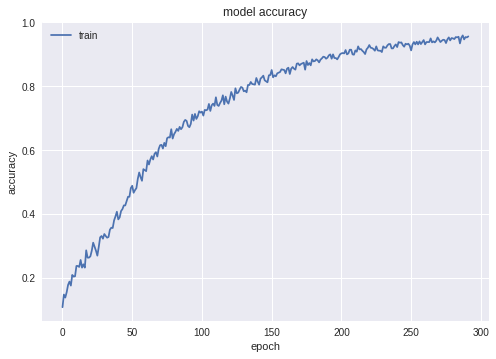

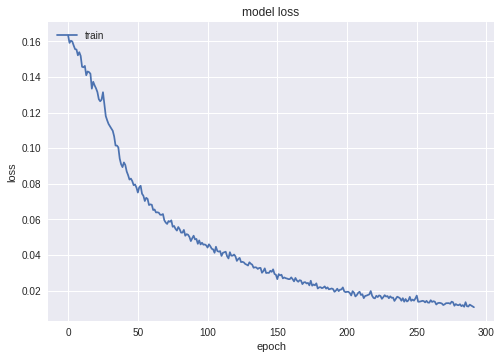

200/200 [==============================] - 0s 1ms/step
Test loss: 0.05713601648807526
Test accuracy: 0.57
(200, 10)
[[ 9  3  0  1  2  1  1  3  0  0]
 [ 0 15  4  0  0  0  1  0  0  0]
 [ 0  4 11  0  1  0  0  0  2  2]
 [ 0  4  1 13  0  0  1  0  0  1]
 [ 0  0  0  0 10  1  7  0  2  0]
 [ 1  0  0  0  4 11  4  0  0  0]
 [ 3  1  0  0  2  3  9  2  0  0]
 [ 0  0  0  4  2  0  0 14  0  0]
 [ 0  2  1  1  2  0  0  0 14  0]
 [ 3  1  0  0  1  2  0  1  4  8]]
              precision    recall  f1-score   support

           0       0.56      0.45      0.50        20
           1       0.50      0.75      0.60        20
           2       0.65      0.55      0.59        20
           3       0.68      0.65      0.67        20
           4       0.42      0.50      0.45        20
           5       0.61      0.55      0.58        20
           6       0.39      0.45      0.42        20
           7       0.70      0.70      0.70        20
           8       0.64      0.70      0.67        20
           9

In [0]:
model = Sequential()
model.add(Conv1D(10, kernel_size=(3), activation='relu', 
                 data_format="channels_last"))
model.add(MaxPooling1D(pool_size=(3)))
model.add(Conv1D(5, kernel_size=(3), activation='relu',
                 data_format="channels_last"))
model.add(MaxPooling1D(pool_size=(3)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(loss='mean_squared_error',
              optimizer=optimizers.SGD(lr=0.01, momentum=0.8, decay=0.0005),
              metrics=['accuracy', 'mae'])
callbacks = [EarlyStopping(monitor='val_loss', min_delta=0.001, patience=50, 
                           verbose=0, mode='auto', baseline=None, 
                           restore_best_weights=True)]
history = model.fit(train_x, train_y,batch_size=100,epochs=500,verbose=2,
                    validation_split=0.2, callbacks=callbacks)
model.summary()
print("Model Created") 

#plotting training
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#testing
score = model.evaluate(test_x, test_y, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

pred_y = model.predict(test_x)
print(pred_y.shape)
predy = np.argmax(pred_y, axis=1).T
print(confusion_matrix(testy[0:200], predy))
print(classification_report(testy[0:200], predy))

- though it traied for all of the 500 epochs, when epoch limit was changed to 100 and patiance to 100 it only trained till 375 epoch
- here we vary the patiance to test it effect

Patiance:  1000
Train on 960 samples, validate on 240 samples
Epoch 1/1000
 - 3s - loss: 0.1724 - acc: 0.1042 - mean_absolute_error: 0.1823 - val_loss: 0.1404 - val_acc: 0.3375 - val_mean_absolute_error: 0.1620
Epoch 2/1000
 - 2s - loss: 0.1730 - acc: 0.1250 - mean_absolute_error: 0.1817 - val_loss: 0.1459 - val_acc: 0.3333 - val_mean_absolute_error: 0.1628
Epoch 3/1000
 - 2s - loss: 0.1728 - acc: 0.1302 - mean_absolute_error: 0.1810 - val_loss: 0.1434 - val_acc: 0.3500 - val_mean_absolute_error: 0.1603
Epoch 4/1000
 - 2s - loss: 0.1740 - acc: 0.1250 - mean_absolute_error: 0.1822 - val_loss: 0.1295 - val_acc: 0.4083 - val_mean_absolute_error: 0.1493
Epoch 5/1000
 - 2s - loss: 0.1676 - acc: 0.1583 - mean_absolute_error: 0.1759 - val_loss: 0.1295 - val_acc: 0.3917 - val_mean_absolute_error: 0.1517
Epoch 6/1000
 - 2s - loss: 0.1639 - acc: 0.1740 - mean_absolute_error: 0.1727 - val_loss: 0.1657 - val_acc: 0.2292 - val_mean_absolute_error: 0.1854
Epoch 7/1000
 - 2s - loss: 0.1617 - acc: 0.1

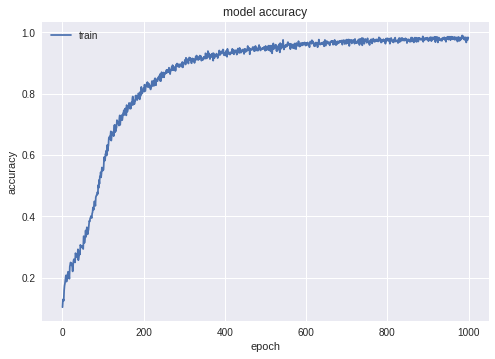

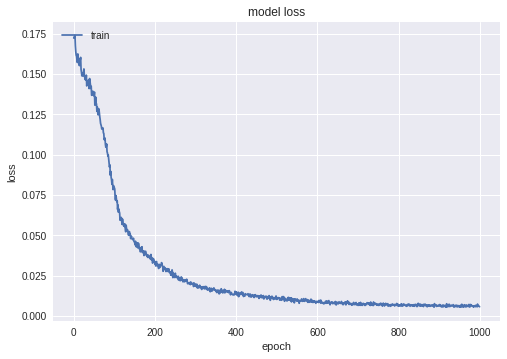

200/200 [==============================] - 0s 1ms/step
Test loss: 0.05058963313698769
Test accuracy: 0.66
(200, 10)
[[11  0  0  1  2  0  2  0  4  0]
 [ 0 16  4  0  0  0  0  0  0  0]
 [ 4  6  9  0  0  0  1  0  0  0]
 [ 1  0  4  9  0  0  4  1  1  0]
 [ 0  0  0  0 17  1  2  0  0  0]
 [ 1  0  0  0  1 15  1  1  0  1]
 [ 0  2  1  0  1  0  9  0  1  6]
 [ 0  0  3  1  0  0  0 16  0  0]
 [ 1  0  0  0  0  0  3  0 16  0]
 [ 1  0  0  0  1  0  0  2  2 14]]
              precision    recall  f1-score   support

           0       0.58      0.55      0.56        20
           1       0.67      0.80      0.73        20
           2       0.43      0.45      0.44        20
           3       0.82      0.45      0.58        20
           4       0.77      0.85      0.81        20
           5       0.94      0.75      0.83        20
           6       0.41      0.45      0.43        20
           7       0.80      0.80      0.80        20
           8       0.67      0.80      0.73        20
           9

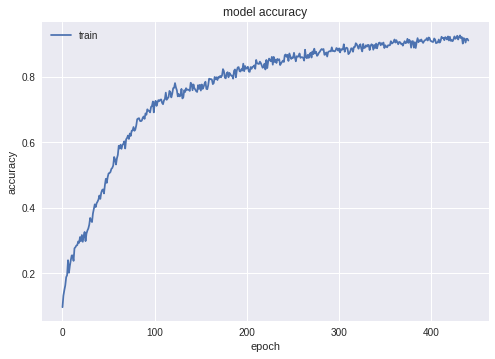

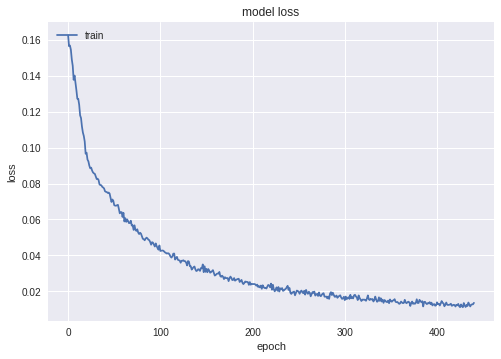

200/200 [==============================] - 0s 1ms/step
Test loss: 0.06742684721946716
Test accuracy: 0.495
(200, 10)
[[ 5  3  1  2  3  2  1  1  2  0]
 [ 1 14  4  0  0  0  1  0  0  0]
 [ 0  8 11  0  0  0  1  0  0  0]
 [ 1  1  1 16  1  0  0  0  0  0]
 [ 1  2  0  4  8  0  1  3  1  0]
 [ 0  0  0  0  0  8  2  0  3  7]
 [ 1  1  0  0  1  1 11  2  2  1]
 [ 0  1  4  0  0  0  0 12  1  2]
 [ 1  0  0  0  2  1  4  1  7  4]
 [ 1  0  0  0  0  4  1  3  4  7]]
              precision    recall  f1-score   support

           0       0.45      0.25      0.32        20
           1       0.47      0.70      0.56        20
           2       0.52      0.55      0.54        20
           3       0.73      0.80      0.76        20
           4       0.53      0.40      0.46        20
           5       0.50      0.40      0.44        20
           6       0.50      0.55      0.52        20
           7       0.55      0.60      0.57        20
           8       0.35      0.35      0.35        20
           

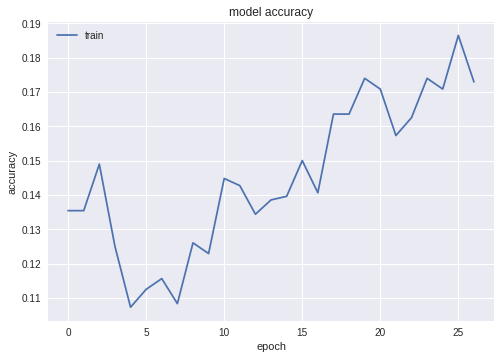

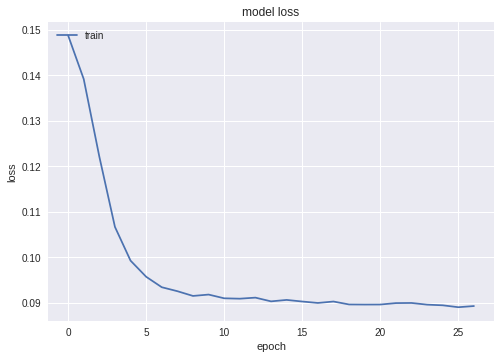

200/200 [==============================] - 0s 1ms/step
Test loss: 0.09095594704151154
Test accuracy: 0.095
(200, 10)
[[3 0 2 2 2 3 1 2 5 0]
 [0 3 5 5 2 2 0 1 1 1]
 [2 3 4 2 1 1 2 2 2 1]
 [3 3 2 2 2 2 1 0 3 2]
 [2 2 2 3 2 3 1 2 1 2]
 [7 3 2 1 1 1 1 1 2 1]
 [1 2 2 2 1 3 2 0 6 1]
 [3 4 1 0 3 2 2 1 2 2]
 [5 1 1 1 3 3 2 3 1 0]
 [2 2 0 3 4 2 3 1 3 0]]
              precision    recall  f1-score   support

           0       0.11      0.15      0.12        20
           1       0.13      0.15      0.14        20
           2       0.19      0.20      0.20        20
           3       0.10      0.10      0.10        20
           4       0.10      0.10      0.10        20
           5       0.05      0.05      0.05        20
           6       0.13      0.10      0.11        20
           7       0.08      0.05      0.06        20
           8       0.04      0.05      0.04        20
           9       0.00      0.00      0.00        20

   micro avg       0.10      0.10      0.10       200
  

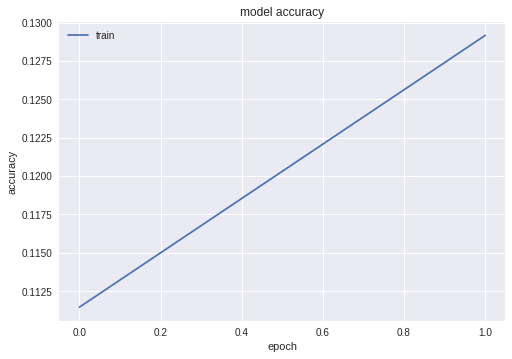

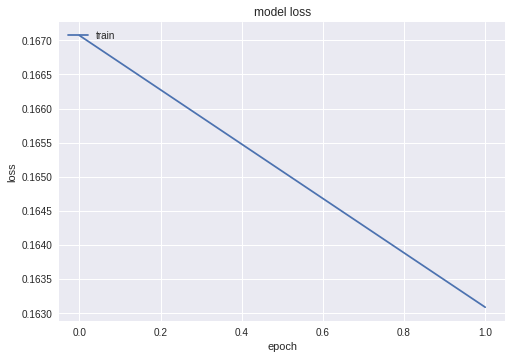

200/200 [==============================] - 0s 1ms/step
Test loss: 0.16248069167137147
Test accuracy: 0.105
(200, 10)
[[ 6  0  0  3 11  0  0  0  0  0]
 [ 8  0  0  5  7  0  0  0  0  0]
 [ 9  0  0  2  9  0  0  0  0  0]
 [ 8  0  0  1 11  0  0  0  0  0]
 [ 3  0  0  3 14  0  0  0  0  0]
 [10  0  0  2  8  0  0  0  0  0]
 [13  0  0  2  5  0  0  0  0  0]
 [ 4  0  0  3 13  0  0  0  0  0]
 [ 9  0  0  1 10  0  0  0  0  0]
 [10  0  0  1  9  0  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.07      0.30      0.12        20
           1       0.00      0.00      0.00        20
           2       0.00      0.00      0.00        20
           3       0.04      0.05      0.05        20
           4       0.14      0.70      0.24        20
           5       0.00      0.00      0.00        20
           6       0.00      0.00      0.00        20
           7       0.00      0.00      0.00        20
           8       0.00      0.00      0.00        20
           

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
p = 1000
while(p>=1):
    print("Patiance: ",p)
    model = Sequential()
    model.add(Conv1D(10, kernel_size=(3), activation='relu', 
                     data_format="channels_last"))
    model.add(MaxPooling1D(pool_size=(3)))
    model.add(Conv1D(5, kernel_size=(3), activation='relu',
                     data_format="channels_last"))
    model.add(MaxPooling1D(pool_size=(3)))
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='mean_squared_error',
                  optimizer=optimizers.SGD(lr=0.01, momentum=0.8, decay=0.0005),
                  metrics=['accuracy', 'mae'])
    callbacks = [EarlyStopping(monitor='val_loss', min_delta=0.001, patience=p, 
                               verbose=0, mode='auto', baseline=None, 
                               restore_best_weights=True)]
    history = model.fit(train_x, train_y,batch_size=100,epochs=1000,verbose=2,
                        validation_split=0.2, callbacks=callbacks)
    model.summary()
    print("Model Created") 

    #plotting training
    plt.plot(history.history['acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    #testing
    score = model.evaluate(test_x, test_y, verbose=1)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

    pred_y = model.predict(test_x)
    print(pred_y.shape)
    predy = np.argmax(pred_y, axis=1).T
    print(confusion_matrix(testy[0:200], predy))
    print(classification_report(testy[0:200], predy))
    p = p / 10

In [0]:
model = Sequential()
model.add(Conv1D(32, kernel_size=(10), activation='relu', data_format="channels_last"))
model.add(Conv1D(32, kernel_size=(3), activation='relu', data_format="channels_last"))
model.add(MaxPooling1D(pool_size=(3)))
model.add(Conv1D(64, kernel_size=(5), activation='relu', data_format="channels_last"))
model.add(MaxPooling1D(pool_size=(3)))
model.add(Conv1D(64, kernel_size=(1), activation='relu', data_format="channels_last"))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(loss='mean_squared_error',
              optimizer=optimizers.SGD(lr=0.001, momentum=0.8, decay=0.0005),
              metrics=['accuracy', 'mae'])
callbacks = [EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, verbose=0, mode='auto', baseline=None, restore_best_weights=True)]
history = model.fit(train_x, train_y,batch_size=100,epochs=100,verbose=2,
                    validation_split=0.2,callbacks=callbacks)
model.summary()
print("Model Created") 

#plotting training
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#testing
score = model.evaluate(test_x, test_y, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

pred_y = model.predict(test_x)
print(pred_y.shape)
predy = np.argmax(pred_y, axis=1).T
print(confusion_matrix(testy, predy))
print(classification_report(testy, predy))